In [87]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import models
from keras import layers

In [88]:
def calc_inductance(coil, thin=0.0001):
    """Расчёт собственной индуктивности между двумя витками.
    :param coil: список с радиусом первой катушки
    :type coil: list
    :rtype: float
    :return: L, собственная индуктивность витка
    """
    mu0 = 4 * np.pi * 10 ** (-7)
    L = mu0 * coil * (np.log(8 * coil / thin) - 7 / 4 + (thin ** 2) / (8 * coil ** 2) * (np.log(8 * coil / thin) + 1 / 3))
    return L


def generate_dataset():
    train_data = np.array([[]])
    train_etalon = np.array([])
    thin = 0.0001
    for r in np.linspace(0.001, 0.5, 10000):
            x = np.array([[r, thin]])
            train_data = np.append(train_data, x)
            train_etalon = np.append(train_etalon, calc_inductance(r, thin))
    return train_data.reshape(10000, 2), train_etalon.reshape(10000, 1)

train_data, train_etalon = generate_dataset()
print(train_data.shape)
print(train_etalon.shape)

(10000, 2)
(10000, 1)


In [117]:
network = models.Sequential()
network.add(layers.Dense(5, activation='linear', input_shape=(2,)))
network.add(layers.Dense(1))
network.compile(optimizer=keras.optimizers.Adam(0.1),
                loss="mean_squared_error")
log = network.fit(train_data, train_etalon, epochs=100, verbose=False)

In [118]:
test_data = np.array([])
coil_2 = np.linspace(start=0.02, stop=0.1, num=1000)
thin = 0.0001
for r in coil_2:
    x = np.array([r, thin])
    test_data = np.append(test_data, x)
test_data = test_data.reshape(1000, 2)

In [119]:
pred = network.predict(test_data)

32/32 [==============================] - 0s 1ms/step


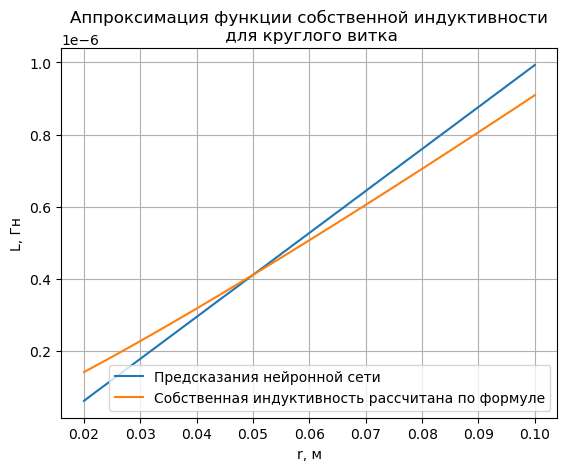

In [130]:
si = calc_inductance(coil_2, thin=0.0001)

plt.title("Аппроксимация функции собственной индуктивности\n для круглого витка")
plt.plot(coil_2, pred, label="Предсказания нейронной сети")
plt.plot(coil_2, si, label="Собственная индуктивность рассчитана по формуле")
plt.legend()
plt.grid()
plt.ylabel("L, Гн")
plt.xlabel("r, м")
plt.savefig("neural_network_approx.png")
plt.show()